# ASTRO 9 - Final Project - Luminosity Analysis 


Orbital Periods vs. Luminosity

In [168]:
########################################
### This file is created by: Aaron Su###
## University of California - Berkeley##
############# Astronomy 9 ##############
############# Summer 2022 ##############
#    _                     _                 _ _            ___              _           _     
#   | |                   (_)               (_) |          / _ \            | |         (_)    
#   | |    _   _ _ __ ___  _ _ __   ___  ___ _| |_ _   _  / /_\ \_ __   __ _| |_   _ ___ _ ___ 
#   | |   | | | | '_ ` _ \| | '_ \ / _ \/ __| | __| | | | |  _  | '_ \ / _` | | | | / __| / __|
#   | |___| |_| | | | | | | | | | | (_) \__ \ | |_| |_| | | | | | | | | (_| | | |_| \__ \ \__ \
#   \_____/\__,_|_| |_| |_|_|_| |_|\___/|___/_|\__|\__, | \_| |_/_| |_|\__,_|_|\__, |___/_|___/
#                                                __/ |                       __/ |          
#                                               |___/                       |___/           
#
#
# Version 0.0.1

#Libary Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as scint
import scipy.optimize as sco



#Dataframe
Location = r'dataframe (1).csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df.drop(df.columns[[3,4,5,6,10, 11, 19,20]], axis=1,inplace=True)
df


,System,Period (days),V,log Teff (K),log (L/Lsun),[M/H],B-V,Sec Spectral type,Sec Mass (Msun ),Sec Radius (Rsun),Sec Surface gravity (cgs),Sec Log Teff (K),Sec log (L/Lsun)
0,V3903 Sgr,1.744,7.27,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032
1,V467 Vel,2.753,10.90,4.559 ± 0.031,5.187 ± 0.126,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110
2,CC Cas,3.366,7.08,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064
3,EM Car,3.414,8.38,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10
4,δ Cir,3.902,5.09,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,UScoCTIO 5,34.001,16.19,3.515 ± 0.013,-1.105 ± 0.053,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059
288,KOI-126 BC,1.722,-1.00,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020
289,CM Dra,1.268,12.90,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056
290,NGTS J052218.2-250710.4,1.748,16.88,3.476 ± 0.014,NaN,NaN,1.49,M5_V,0.1742 ± 0.0013,0.2168 ± 0.0048,5.007 ± 0.020,3.477 ± 0.012,NaN


# Scenario 1


Log(L/Sun) v.s. Orbital Period (Days)

In [169]:
#Replaces the spaces in the dataframe column headers
df.columns = [c.replace(' ', '_') for c in df.columns]
#Replaces the parthanthesis in the dataframe column headers
df.columns = [c.replace('(', '_') for c in df.columns]
df.columns = [c.replace(')', '_') for c in df.columns]
#Replaces the slash in the dataframe column headers
df.columns = [c.replace('/', '_') for c in df.columns]
#drops nan values for Lumonsity and Period values
df.dropna(subset=['log__L_Lsun_', 'Period__days_'], inplace=True)
df

,System,Period__days_,V,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_
0,V3903 Sgr,1.744,7.27,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032
1,V467 Vel,2.753,10.90,4.559 ± 0.031,5.187 ± 0.126,NaN,0.00,B1_V,8.25 ± 0.17,3.49 ± 0.03,4.268 ± 0.017,4.402 ± 0.046,3.649 ± 0.110
2,CC Cas,3.366,7.08,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064
3,EM Car,3.414,8.38,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10
4,δ Cir,3.902,5.09,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,LSPM J1112+7626,41.033,14.85,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09
287,UScoCTIO 5,34.001,16.19,3.515 ± 0.013,-1.105 ± 0.053,NaN,1.62,M4.5_V,0.3263 ± 0.0020,0.8376 ± 0.0024,4.1053 ± 0.0021,3.513 ± 0.013,-1.146 ± 0.059
288,KOI-126 BC,1.722,-1.00,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020
289,CM Dra,1.268,12.90,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056


In [170]:
#S
df.columns

Index(['System', 'Period__days_', 'V', 'log_Teff__K_', 'log__L_Lsun_', '[M_H]',
       'B-V', 'Sec_Spectral_type', 'Sec_Mass__Msun__', 'Sec_Radius__Rsun_',
       'Sec_Surface_gravity__cgs_', 'Sec_Log_Teff__K_', 'Sec_log__L_Lsun_'],
      dtype='object')

In [175]:
#Grabs Sigma Values, as well as splitting 'log__L_Lsun_' from being a string to a float
lum = np.array(df['log__L_Lsun_'])
orbital = np.array(df['Period__days_'])

luminosity = []
lum_sigma = []

for i in range(len(lum)):
    luminosity.append(float(lum[i][0:5]))
    lum_sigma.append(float(lum[i][-5:-1]))


#Creates a new column for Luminosity & Uncertainies
df['Luminosity'] = luminosity
df['Lum_Sigma'] = lum_sigma

df

,System,Period__days_,V,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma
0,V404 CMa,0.452,17.45,3.623 ± 0.010,-0.867 ± 0.044,NaN,1.17,none,0.662 ± 0.005,0.68 ± 0.02,4.614 ± 0.025,3.596 ± 0.012,-1.028 ± 0.054,-0.860,0.04
1,GU Boo,0.489,13.70,3.593 ± 0.014,-1.09 ± 0.06,NaN,1.50,M1_V,0.599 ± 0.006,0.620 ± 0.020,4.630 ± 0.028,3.581 ± 0.015,-1.14 ± 0.08,-1.090,0.00
2,NSVS 10653195,0.561,12.50,3.628 ± 0.010,-0.863 ± 0.050,NaN,1.17,K7_V,0.6511 ± 0.0052,0.672 ± 0.020,4.597 ± 0.027,3.613 ± 0.012,-0.939 ± 0.055,-0.860,0.05
3,CG Cyg,0.631,10.08,3.721 ± 0.015,-0.26 ± 0.06,NaN,0.86,K3_V,0.81 ± 0.013,0.84 ± 0.014,4.505 ± 0.016,3.674 ± 0.006,-0.51 ± 0.03,-0.260,0.00
4,ASAS J212954-5620.1,0.702,11.93,3.677 ± 0.014,-0.482 ± 0.057,NaN,1.17,none,0.703 ± 0.013,0.718 ± 0.017,4.574 ± 0.020,3.625 ± 0.019,-0.840 ± 0.076,-0.480,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,OGLE SMC126.1 210,634.999,16.77,3.651 ± 0.007,2.836 ± 0.047,-0.87,1.20,K1_III,1.669 ± 0.039,39.00 ± 0.98,1.479 ± 0.031,3.654 ± 0.007,2.752 ± 0.049,2.836,0.04
242,OGLE-LMC-ECL-12669,749.632,17.21,3.666 ± 0.008,2.384 ± 0.034,-0.30,1.20,G9_III,1.962 ± 0.030,23.36 ± 0.30,1.994 ± 0.011,3.673 ± 0.009,2.386 ± 0.038,2.384,0.03
243,OGLE-LMC-SC9-230659,772.638,16.63,3.699 ± 0.006,2.783 ± 0.025,-0.24,1.09,G6_III,3.429 ± 0.030,23.40 ± 0.31,2.235 ± 0.011,3.702 ± 0.009,2.500 ± 0.036,2.783,0.02
244,KIC 5640750,987.398,11.88,3.656 ± 0.007,1.871 ± 0.029,-0.29,1.24,none,1.292 ± 0.017,1.853 ± 0.023,4.014 ± 0.010,3.767 ± 0.015,0.555 ± 0.060,1.871,0.02


In [176]:
#Sort Values in terms of Orbital Period
df = df.sort_values(by = 'Luminosity',kind='quicksort')
df = df.reset_index(drop=True)
df

,System,Period__days_,V,log_Teff__K_,log__L_Lsun_,[M_H],B-V,Sec_Spectral_type,Sec_Mass__Msun__,Sec_Radius__Rsun_,Sec_Surface_gravity__cgs_,Sec_Log_Teff__K_,Sec_log__L_Lsun_,Luminosity,Lum_Sigma
0,CM Dra,1.268,12.90,3.496 ± 0.010,-2.258 ± 0.038,-0.30,1.60,M4.5_V,0.2141 ± 0.0009,0.2396 ± 0.0015,5.009 ± 0.006,3.494 ± 0.014,-2.313 ± 0.056,-2.250,0.03
1,KOI-126 BC,1.722,-1.00,3.510 ± 0.005,-2.194 ± 0.020,0.15,-1.00,M,0.2073 ± 0.0006,0.2315 ± 0.0007,5.026 ± 0.003,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.02
2,LSPM J1112+7626,41.033,14.85,3.486 ± 0.024,-1.92 ± 0.08,NaN,1.49,none,0.2745 ± 0.0012,0.2978 ± 0.0048,4.929 ± 0.014,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.00
3,PTFEB 132.707+19.810,6.016,17.89,3.513 ± 0.012,-1.863 ± 0.032,0.14,1.66,M4.3_V,0.2098 ± 0.0014,0.272 ± 0.012,4.891 ± 0.039,3.494 ± 0.015,-2.30 ± 0.13,-1.860,0.03
4,EPIC 203710387,2.809,14.30,3.483 ± 0.011,-1.842 ± 0.047,NaN,1.80,M5V,0.1056 ± 0.0027,0.4236 ± 0.0056,4.207 ± 0.010,3.483 ± 0.011,-1.861 ± 0.047,-1.840,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EM Car,3.414,8.38,4.531 ± 0.026,5.02 ± 0.10,NaN,-0.31,O8_V,21.43 ± 0.33,8.34 ± 0.14,3.926 ± 0.016,4.531 ± 0.026,4.92 ± 0.10,5.020,0.10
242,V3903 Sgr,1.744,7.27,4.580 ± 0.021,5.087 ± 0.029,NaN,0.06,O9_V,19.01 ± 0.44,6.125 ± 0.060,4.143 ± 0.013,4.531 ± 0.021,4.658 ± 0.032,5.087,0.02
243,CC Cas,3.366,7.08,4.538 ± 0.025,5.179 ± 0.053,NaN,0.48,B0.5_V,9.95 ± 0.34,6.84 ± 0.18,3.766 ± 0.022,4.452 ± 0.031,4.474 ± 0.064,5.179,0.05
244,δ Cir,3.902,5.09,4.574 ± 0.010,5.184 ± 0.070,NaN,-0.06,O9.5_V,11.41 ± 0.24,5.326 ± 0.091,4.043 ± 0.014,4.519 ± 0.013,4.339 ± 0.090,5.184,0.07


/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/aaronsu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/yw/mbkk14vn3nnczstvd2hkrm4r0000gn/T/ipykernel_79643/1410918823.py:19: RuntimeWarning: invalid value encountered in double_scalars
  corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])


chi^2 =   inf
chi^2/d.f.=  inf


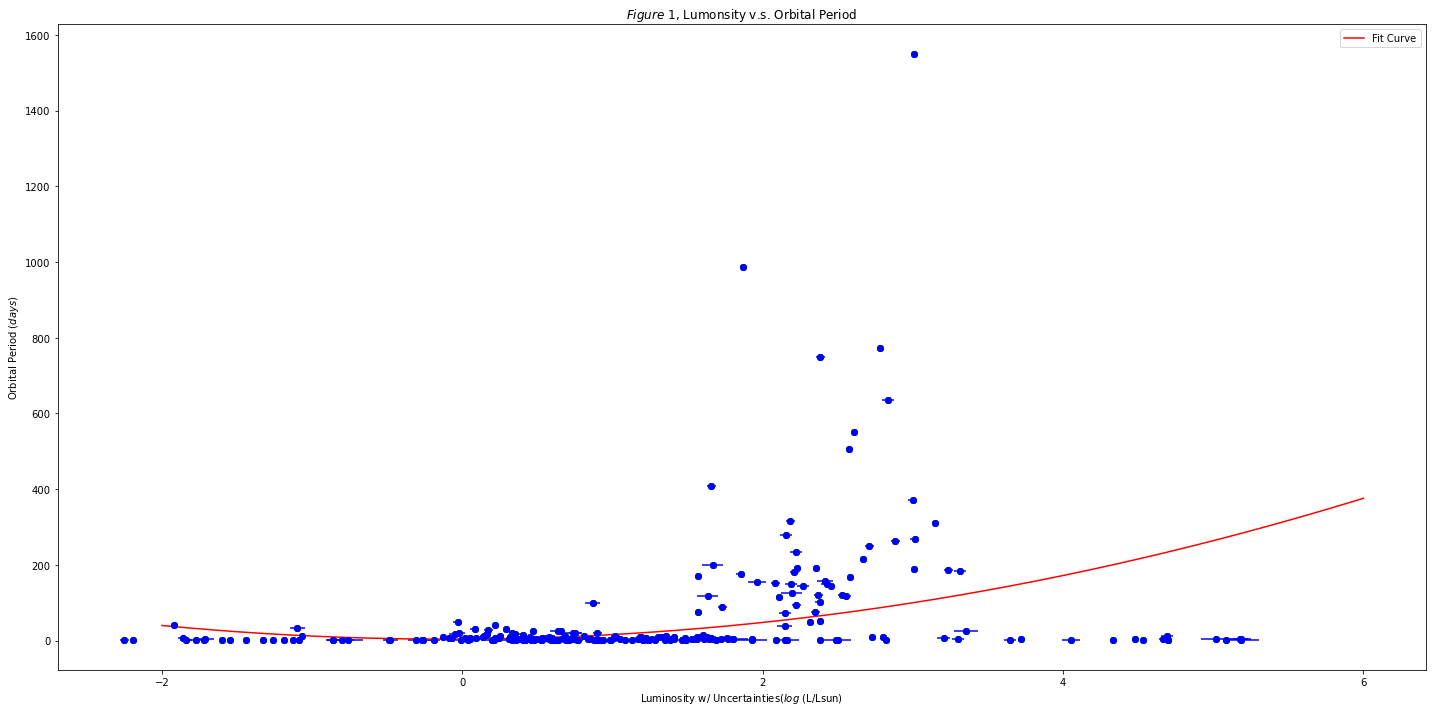

In [302]:
#Sort Values in terms of Luinosity
import scipy.optimize as fitter

lum_df = df.sort_values(by = 'Luminosity',kind='quicksort')
lum_df = df.reset_index(drop=True)

#Fitting
plt.figure()

def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([4.0, 2.0, 10])
par, cov = fitter.curve_fit(model2, lum_df.Luminosity, lum_df.Period__days_, par0, lum_df.Lum_Sigma)

corr = cov.copy()
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        

chi_squared = np.sum(((model2(lum_df.Luminosity, *par)-lum_df.Period__days_)/lum_df.Lum_Sigma)**2)
reduced_chi_squared = (chi_squared)/(len(lum_df.Luminosity)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

plt.errorbar(lum_df.Luminosity, lum_df.Period__days_, xerr=0, yerr=lum_df.Lum_Sigma, fmt='go')

xfit = np.linspace(-2,6,10000)

#Plotting
plt.errorbar(lum_df.Luminosity, lum_df.Period__days_, xerr=lum_df.Lum_Sigma, yerr=0, fmt='bo')
plt.scatter(lum_df.Luminosity, lum_df.Period__days_, c='green')
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-', label='Fit Curve')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('$Figure$ $1$, Lumonsity v.s. Orbital Period')
plt.ylabel('Orbital Period ($days$)')
plt.xlabel('Luminosity w/ Uncertainties($log$ (L/Lsun)')
plt.legend(loc='upper right')
plt.show()

Therefore, according to $Figure$ $1$, there is no correlation between Luminosity and Orbital Periods, as no matter how you try to fit, chi^2 and reduced chi^2 would always be infinity

# Scenario 2
